### PCA - redukcja wymiarów

In [21]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
samples = np.loadtxt('seeds_dataset.txt')
grains = samples[:,[4,3]]
print(grains[:5,:])
np.std(grains, 0)
# sprawdzamy std zeby sprawdzic skale zmiennych na obu osiach

[[ 3.312  5.763]
 [ 3.333  5.554]
 [ 3.337  5.291]
 [ 3.379  5.324]
 [ 3.562  5.658]]


array([ 0.37681405,  0.44200731])

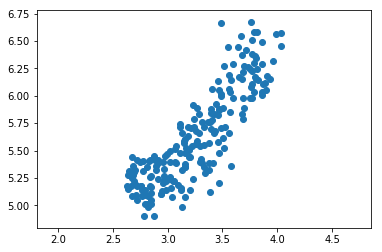

(0.86041493771434674, 8.1213329061934268e-63)

In [23]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr


width = grains[:,0]
length = grains[:,1]
plt.scatter(width, length)
plt.axis('equal')
plt.show()

pearsonr(width, length)
# dane sa skorelowane

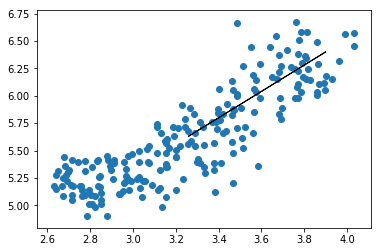

In [25]:
plt.scatter(width,length)

model = PCA()
model.fit(grains)

mean = model.mean_

first_pc = model.components_[0,:]

# kierunek na ktory zrzutujemy (maksymalizacja wariancji)
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1])
plt.show()

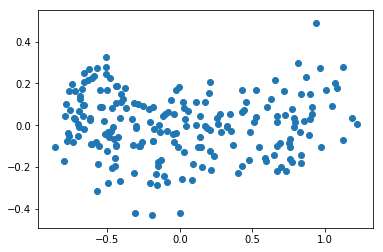

In [27]:
# reprezentacja po zrzutowaniu
model = PCA()
pca_features = model.fit_transform(grains)

plt.scatter(pca_features[:,0], pca_features[:,1])
plt.show()

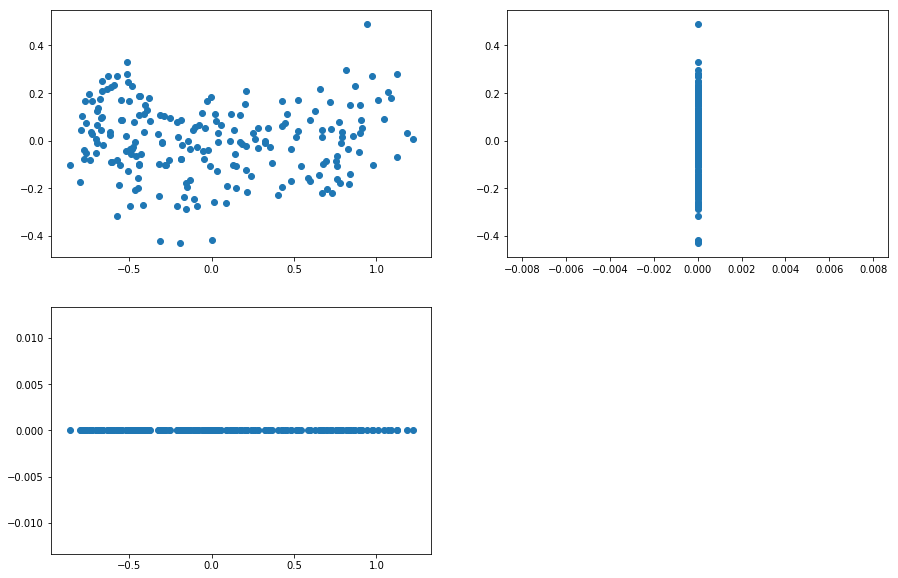

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(pca_features[:,0], pca_features[:,1])

plt.subplot(2,2,2)
plt.scatter([0]*len(pca_features[:,0]), pca_features[:,1])

plt.subplot(2,2,3)
plt.scatter(pca_features[:,0], [0]*len(pca_features[:,1]))

plt.show()

In [31]:
np.var(pca_features[:,0]), np.var(pca_features[:,1])
# jeden wymiar niesie prawie cała informacje

(0.31445007693287752, 0.022909210980954626)

In [32]:
model.explained_variance_

array([ 0.31445008,  0.02290921])

In [33]:
model.explained_variance_ratio_
# 93% do 6%

array([ 0.93209254,  0.06790746])

In [34]:
# zadanie

In [41]:
s = np.diag([1.0]*5)
s[[0,1,3,4],[1,0,4,3]] = 0.98
x = np.random.multivariate_normal([0]*5, s, 200)
x

array([[ -1.96132620e+00,  -1.69539171e+00,  -1.52923138e+00,
         -9.02930393e-01,  -1.00863253e+00],
       [  3.60764974e-01,   1.30632176e-01,   5.05397914e-01,
         -8.72624011e-01,  -6.66775552e-01],
       [ -6.23990360e-01,  -3.14079589e-01,   5.50327509e-01,
         -1.72393938e-01,  -2.71165935e-01],
       [ -5.57674734e-02,  -1.34385776e-01,   1.17007380e+00,
          6.87473291e-01,   5.37823348e-01],
       [  1.10299797e+00,   1.12296152e+00,   1.54309096e+00,
         -9.19050487e-01,  -1.07909297e+00],
       [ -1.12594413e+00,  -1.00378347e+00,  -9.80914283e-02,
         -3.49910782e-01,  -3.03368716e-01],
       [  8.92040239e-01,   6.66100137e-01,   2.43201869e+00,
         -9.34353209e-01,  -8.22895423e-01],
       [  5.46073684e-01,   8.14484879e-01,   1.78424154e+00,
          8.36844303e-01,   5.19272549e-01],
       [  1.19710827e+00,   9.19241634e-01,  -1.39490250e+00,
         -8.11659223e-01,  -5.13912472e-01],
       [  2.43952068e-01,   7.2128904

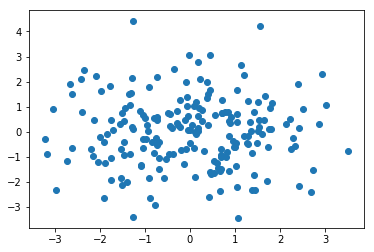

In [46]:
model = PCA()
pca_features = model.fit_transform(x)

plt.scatter(pca_features[:,0], pca_features[:,1])
plt.show()

In [50]:
model.explained_variance_ratio_
# uznajemy ze 3 sa znaczace

array([ 0.39,  0.37,  0.24,  0.  ,  0.  ])

In [51]:
model.components_

array([[ 0.46,  0.45,  0.06, -0.54, -0.54],
       [ 0.54,  0.54,  0.04,  0.46,  0.45],
       [-0.05, -0.05,  1.  ,  0.02,  0.01],
       [-0.49,  0.49, -0.01,  0.51, -0.51],
       [-0.51,  0.51,  0.  , -0.49,  0.49]])

In [52]:
np.set_printoptions(2,suppress=True)
model.transform(x)[:,:3]

array([[-0.78, -2.93, -1.5 ],
       [ 1.03, -0.44,  0.33],
       [-0.21, -0.71,  0.46],
       [-0.73,  0.48,  1.07],
       [ 2.13,  0.33,  1.27],
       [-0.68, -1.48, -0.13],
       [ 1.75,  0.11,  2.19],
       [-0.06,  1.4 ,  1.61],
       [ 1.54,  0.45, -1.65],
       [-0.9 ,  1.79,  2.19],
       [ 0.53, -1.14,  0.07],
       [ 0.96, -0.36, -0.82],
       [-1.01,  0.56, -1.13],
       [-1.46,  0.42, -0.07],
       [-1.45, -0.41, -0.25],
       [ 3.02,  1.06,  0.63],
       [-0.47, -0.9 , -0.08],
       [-2.97, -2.34, -0.33],
       [-0.07,  1.02,  0.03],
       [ 0.27,  0.44, -0.09],
       [-1.77,  1.84, -2.17],
       [-1.27, -3.39,  1.15],
       [-3.04,  0.93, -0.26],
       [-1.04, -0.28,  0.71],
       [ 2.23,  0.5 , -0.22],
       [-1.97,  1.64, -0.2 ],
       [ 1.8 ,  0.12,  0.88],
       [-2.21, -0.69, -1.17],
       [ 1.44, -2.31, -1.27],
       [-1.89, -1.24,  0.24],
       [-0.92, -1.82,  0.58],
       [ 1.05,  0.71, -0.15],
       [-0.35,  2.51, -0.02],
       [ 0

In [53]:
# zadanie

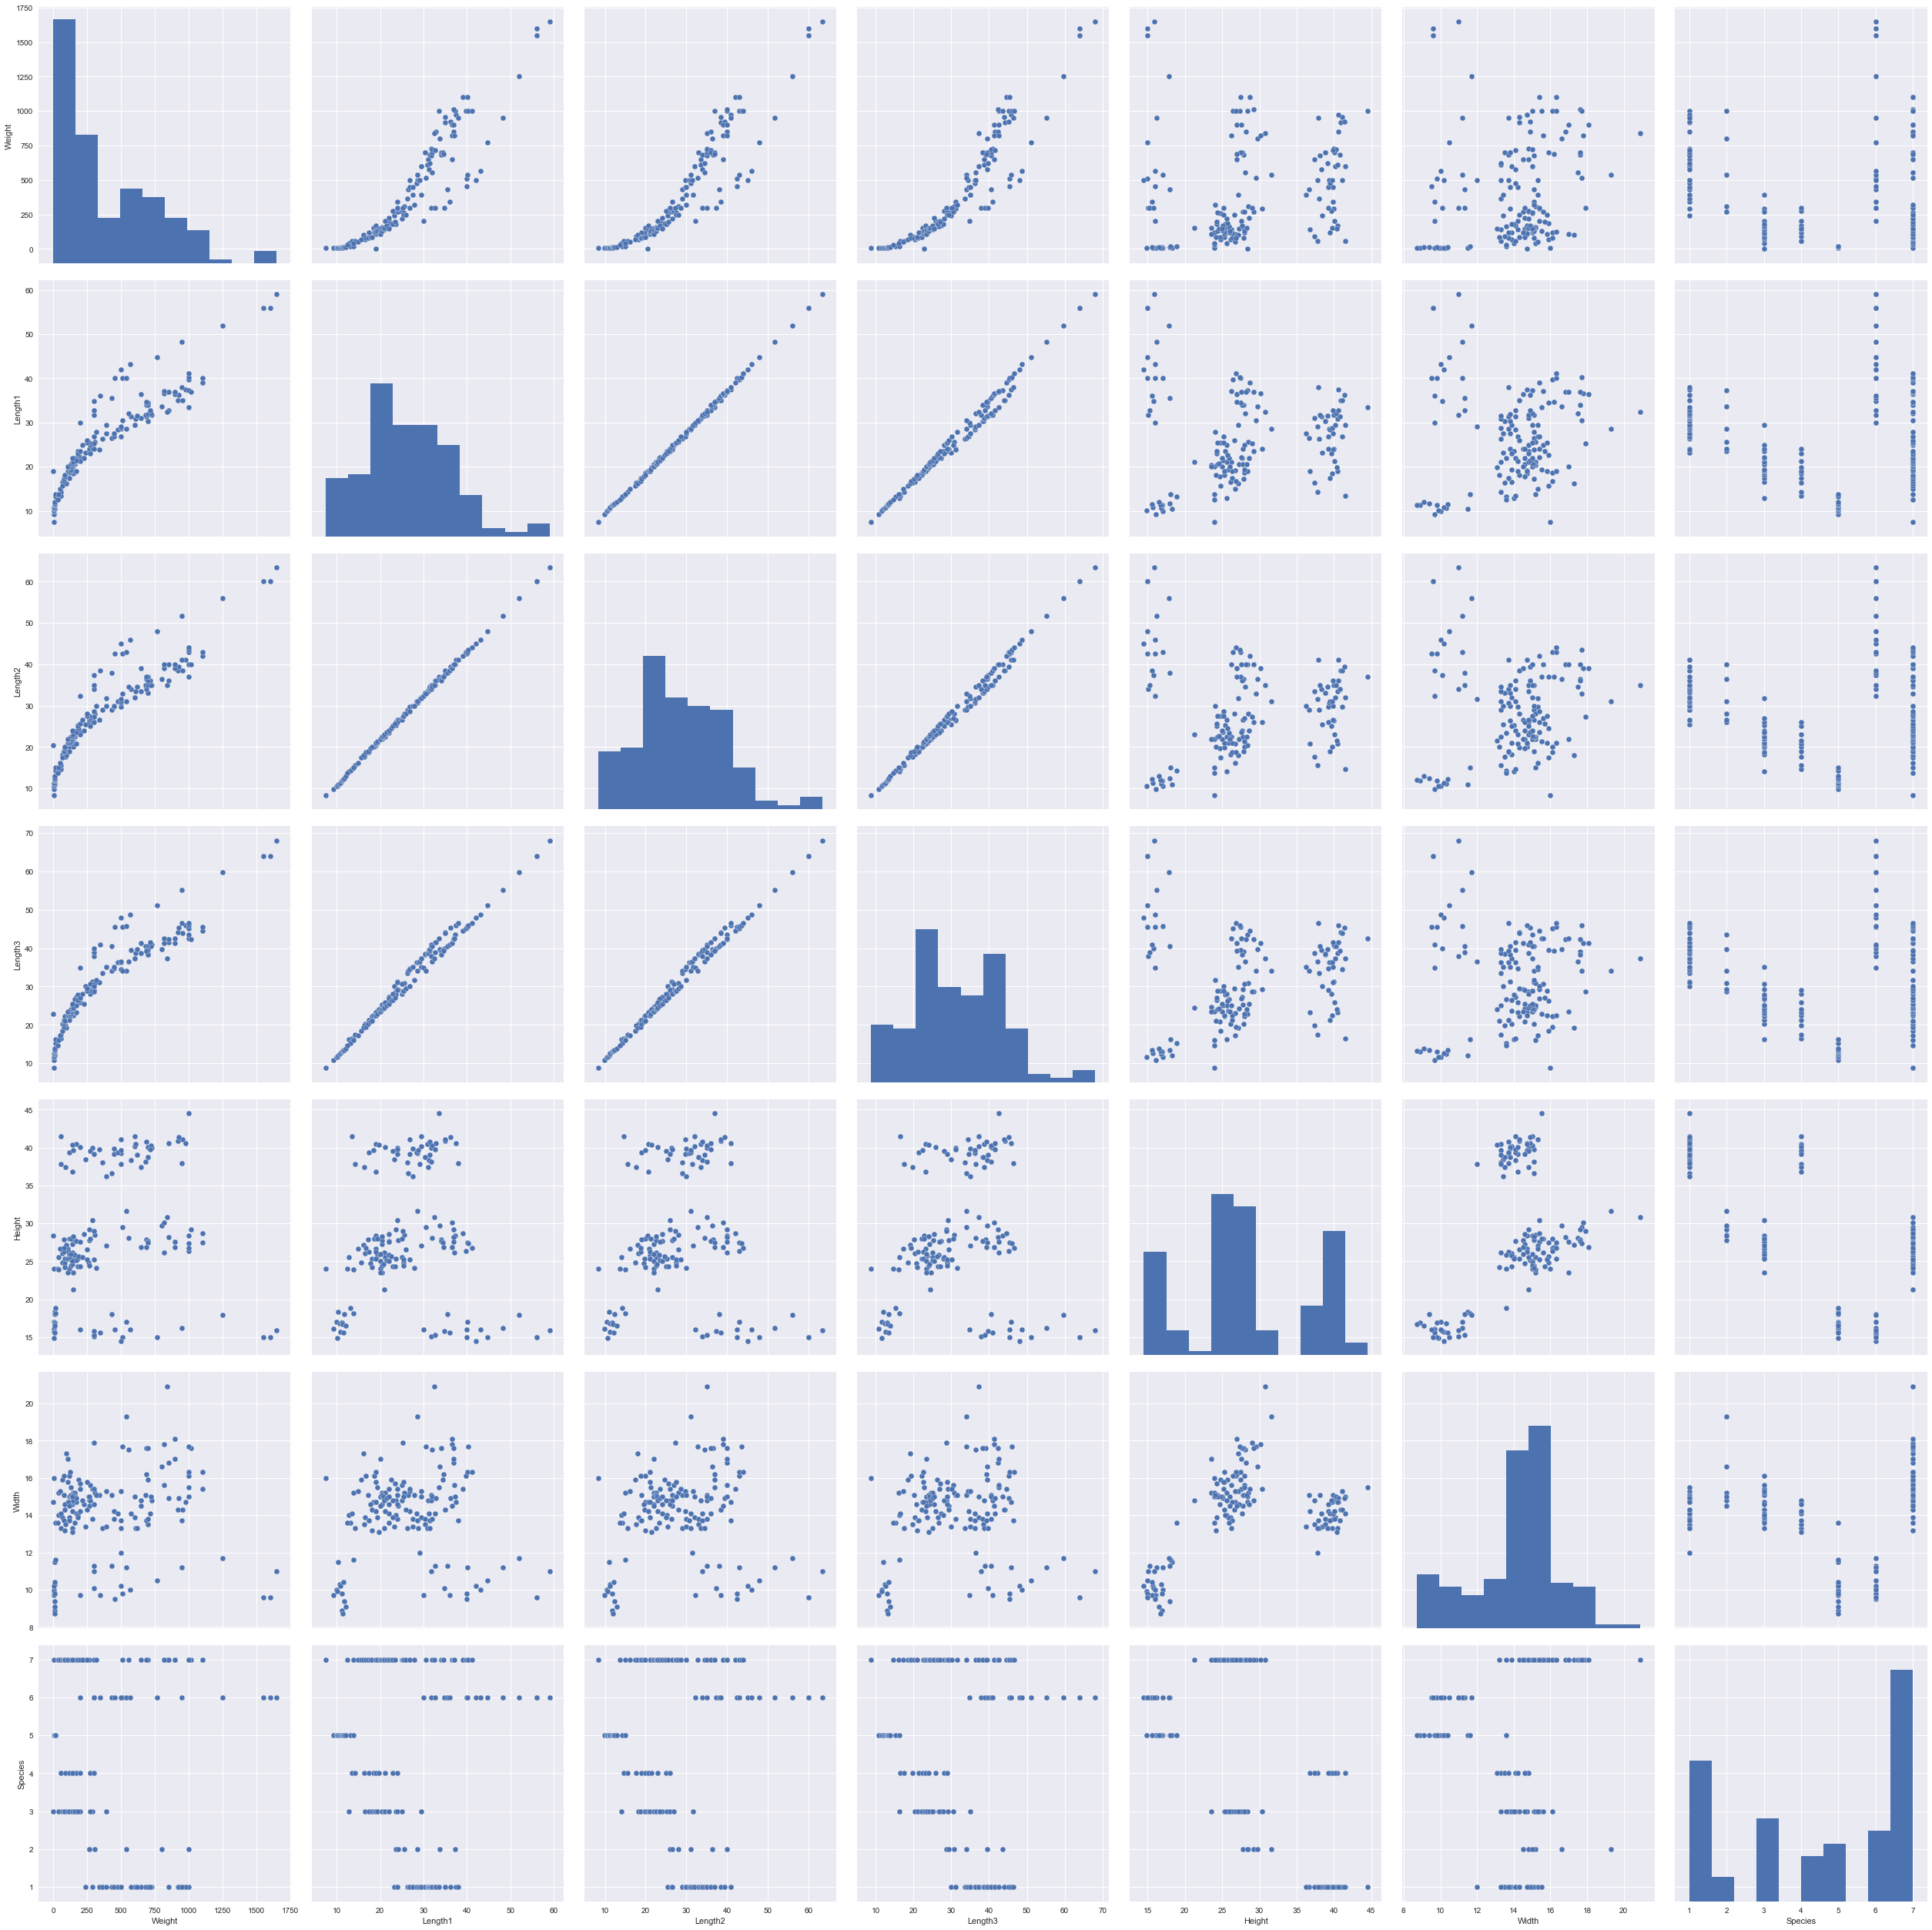

In [98]:
import pandas as pd
samples = pd.read_csv('fish.csv', sep=';', decimal=',')

import seaborn as sns
sns.pairplot(samples, size=5)
plt.show()

from sklearn.preprocessing import scale

In [75]:
samples.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,398.695570,26.226582,28.393038,31.188608,28.256329,14.119620,4.518987
std,359.086204,10.024844,10.746572,11.637010,8.296377,2.281229,2.385523
min,0.000000,7.500000,8.400000,8.800000,14.500000,8.700000,1.000000
25%,120.000000,19.025000,21.000000,23.125000,24.225000,13.400000,2.250000
50%,272.500000,25.100000,27.150000,29.350000,27.000000,14.600000,5.000000
75%,650.000000,32.700000,35.750000,39.675000,37.700000,15.300000,7.000000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,20.900000,7.000000


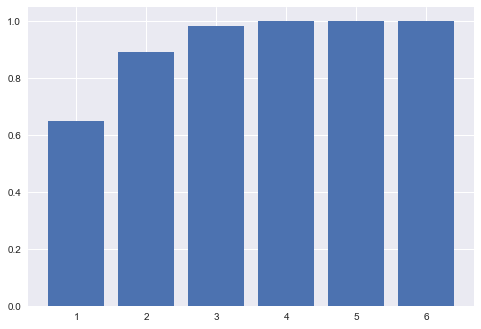

In [99]:
x = scale(samples.drop("Species",axis=1))
pca = PCA()
pca.fit(x)
plt.bar(1+np.arange(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [67]:
# zadanie

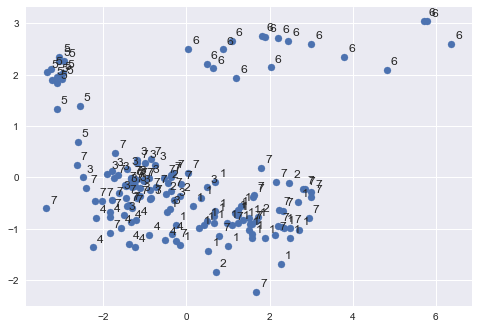

In [77]:
x = scale(samples.drop('Species', axis=1))
pca = PCA(2)
z = pca.fit_transform(x)
plt.scatter(z[:,0], z[:,1])
for i in range(z.shape[0]):
    plt.annotate(samples.Species[i], xy =(z[i,0],z[i,1]), xytext=(z[i,0]+0.1,z[i,1]+0.1))
plt.show()

In [78]:
# zadanie

In [103]:
food = pd.read_csv('food.txt', delimiter=' ', comment='#')
food

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh-potatoes,720,874,566,1033
7,Fresh-Veg,253,265,171,143
8,Other-Veg,488,570,418,355
9,Processed-potatoes,198,203,220,187


In [104]:
x = scale(np.array(food)[:,1:].T.astype('float'))
x

array([[ 0.66, -0.02, -0.26,  0.64, -0.63,  0.13, -0.45,  0.86,  0.38,
        -0.34,  0.81,  0.74, -0.64, -0.05, -0.44,  0.1 , -0.14],
       [ 0.54, -1.28,  1.2 ,  1.15,  1.54,  1.55,  0.44,  1.09,  1.4 ,
         0.08,  1.17,  0.93,  1.68,  1.61, -1.4 ,  0.84,  0.97],
       [ 0.54, -0.23,  0.54, -0.33, -1.1 , -0.54, -1.34, -0.71, -0.5 ,
         1.51, -0.88, -0.06, -0.86, -0.47,  1.19,  0.72,  0.75],
       [-1.73,  1.52, -1.48, -1.46,  0.19, -1.14,  1.35, -1.25, -1.28,
        -1.26, -1.1 , -1.61, -0.18, -1.09,  0.65, -1.66, -1.58]])

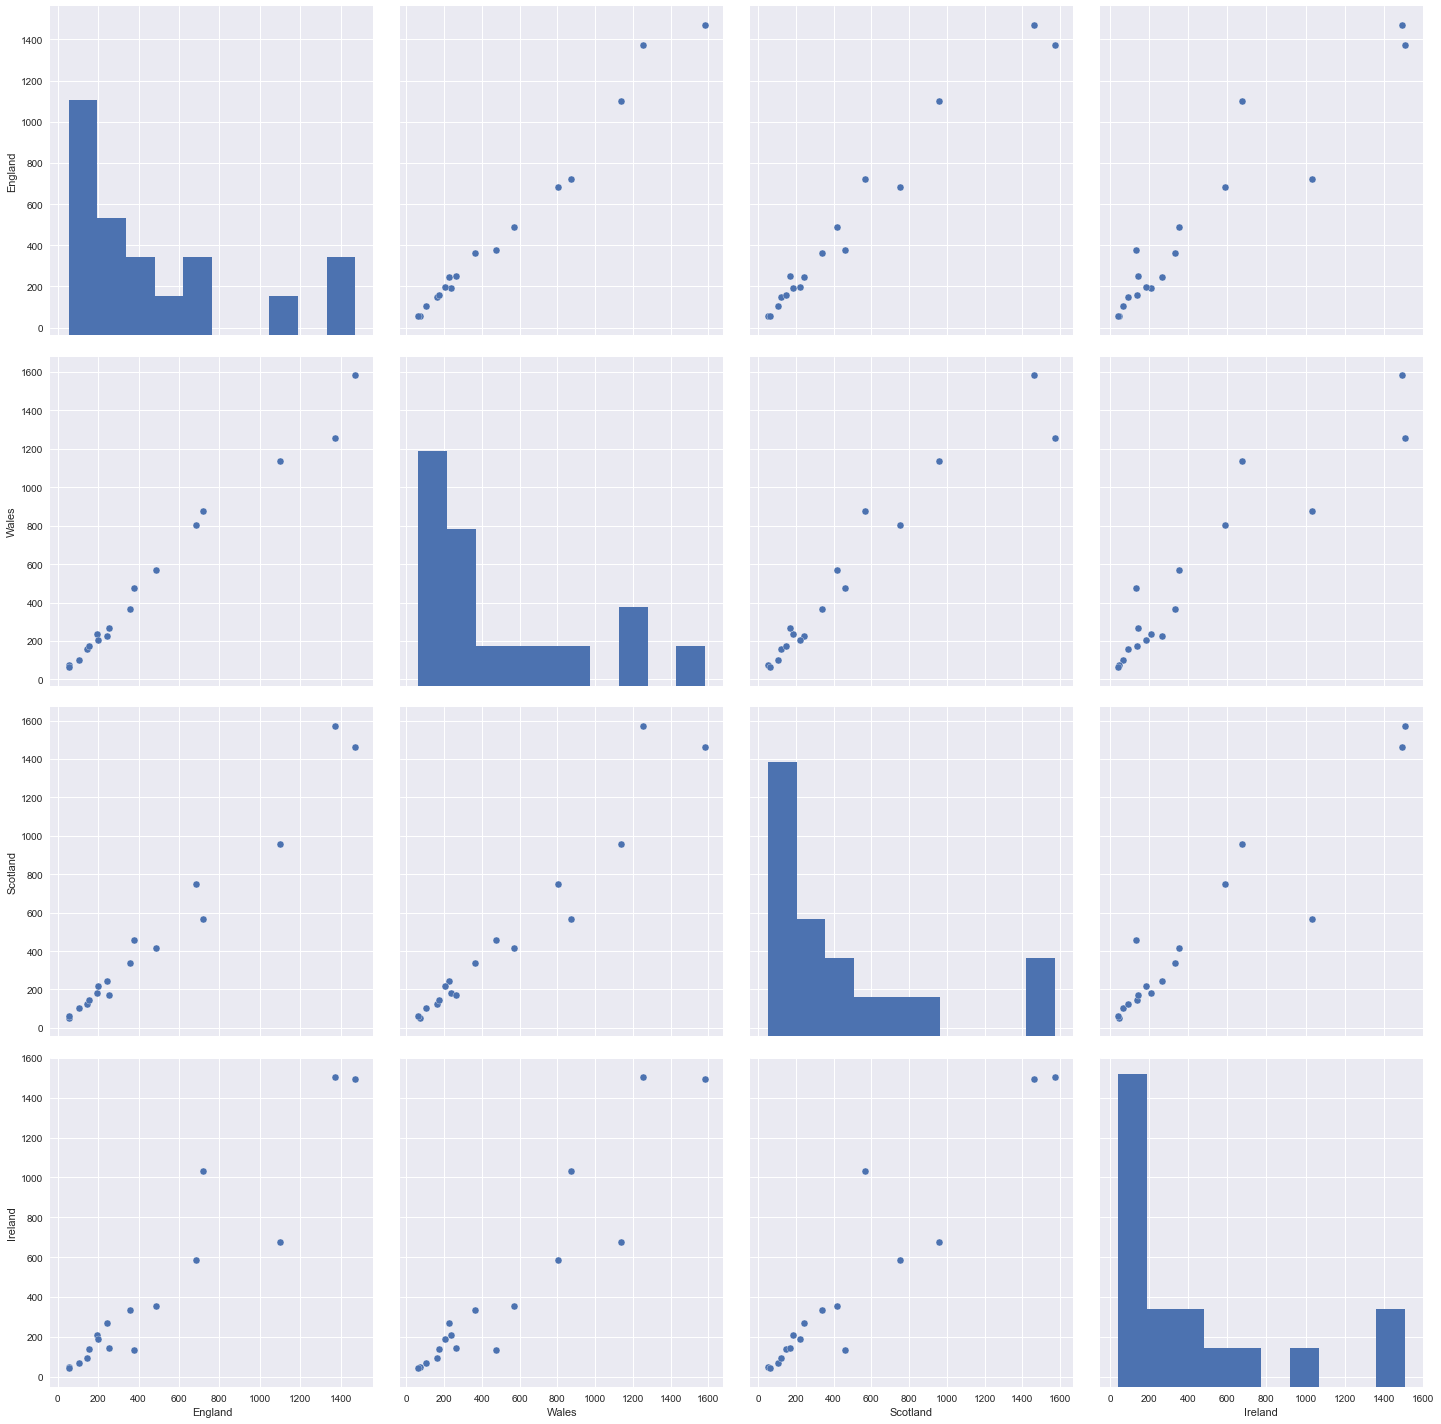

In [105]:
sns.pairplot(food, size=5)
plt.show()

In [110]:
pca = PCA()
z = pca.fit_transform(x)

In [111]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.68,  0.93,  1.  ,  1.  ])

In [112]:
np.arange(pca.n_components_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

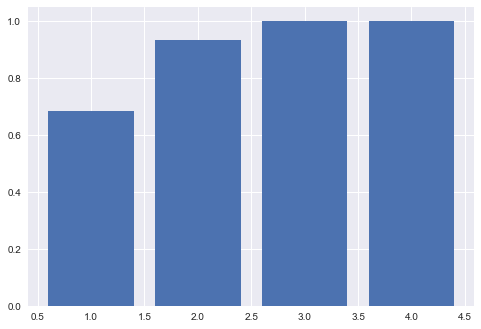

In [113]:
plt.bar(1+np.arange(4),np.cumsum(pca.explained_variance_ratio_))
plt.show()

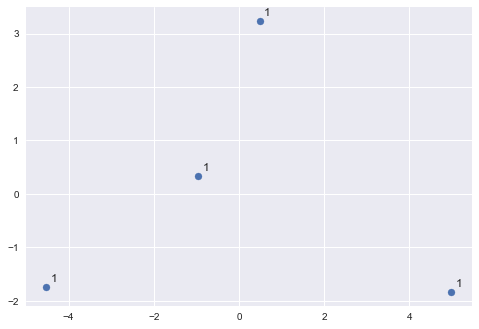

In [114]:
plt.scatter(z[:,0], z[:,1])
for i in range(z.shape[0]):
    plt.annotate(samples.Species[i], xy =(z[i,0],z[i,1]), xytext=(z[i,0]+0.1,z[i,1]+0.1))
plt.show()

In [115]:
pca.components_.T

array([[-0.25,  0.25,  0.19, -0.22],
       [ 0.29, -0.08,  0.15, -0.04],
       [-0.26,  0.14, -0.3 , -0.5 ],
       [-0.29, -0.01,  0.2 ,  0.22],
       [-0.13, -0.4 , -0.34,  0.25],
       [-0.28, -0.14, -0.05,  0.21],
       [ 0.1 , -0.45, -0.11, -0.05],
       [-0.27, -0.1 ,  0.35,  0.36],
       [-0.29, -0.09,  0.07,  0.14],
       [-0.12,  0.41, -0.32,  0.27],
       [-0.26, -0.15,  0.33, -0.4 ],
       [-0.28,  0.08,  0.24, -0.02],
       [-0.18, -0.33, -0.39, -0.02],
       [-0.28, -0.14, -0.15, -0.27],
       [ 0.23,  0.29, -0.17,  0.06],
       [-0.26,  0.23, -0.12,  0.27],
       [-0.25,  0.21, -0.25, -0.09]])

In [116]:
#zadanie

In [142]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [143]:
iris = load_iris()
samples = iris.data
labels = iris.target
samples

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [157]:
samples = scale(samples)

In [158]:
km = KMeans(n_clusters=3)
km.fit(samples)
labels = km.predict(samples)

In [159]:
colors = np.array(sns.color_palette("Set2",5))
colors

array([[ 0.4 ,  0.76,  0.65],
       [ 0.99,  0.55,  0.38],
       [ 0.55,  0.63,  0.8 ],
       [ 0.91,  0.54,  0.76],
       [ 0.65,  0.85,  0.33]])

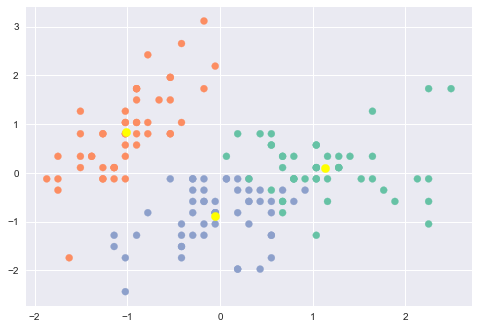

In [160]:
plt.scatter(samples[:,0], samples[:,1], c=colors[labels])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c="yellow",s=70)
plt.show()

In [161]:
model = PCA()
model.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [162]:
model.explained_variance_ratio_

array([ 0.73,  0.23,  0.04,  0.01])

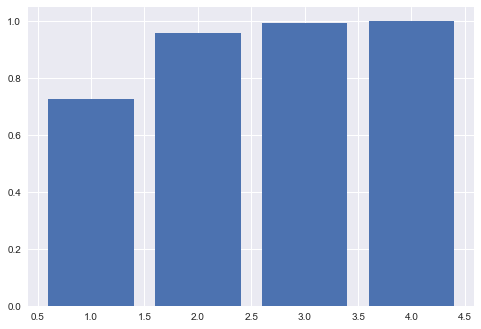

In [163]:
plt.bar(1+np.arange(model.n_components_),np.cumsum(model.explained_variance_ratio_))
plt.show()

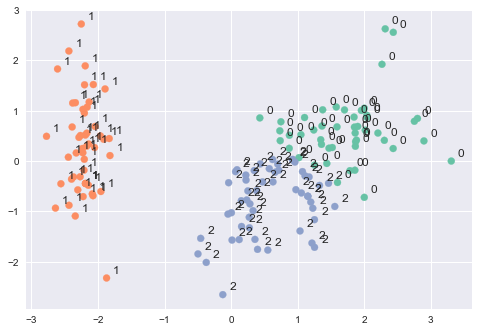

In [164]:
pca = PCA(2)
z = pca.fit_transform(samples)
plt.scatter(z[:,0], z[:,1], c=colors[labels])
for i in range(z.shape[0]):
    plt.annotate(labels[i], xy =(z[i,0],z[i,1]), xytext=(z[i,0]+0.1,z[i,1]+0.1))
plt.show()

Rozwiazanie:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

km = KMeans(3)
groups = km.fit_predict(scale(samples))


pca = PCA(2)
z = pca.fit_transform(scale(samples))


plt.figure(figsize=(12,12))
plt.scatter(z[:,0],z[:,1],c=np.array(colors)[groups])

for i in range(samples.shape[0]):
    plt.annotate(labels[i],xy=(z[i,0],z[i,1]),xytext = (z[i,0]+0.1,z[i,1]+0.1))

plt.show()

In [165]:
#zadanie

In [174]:
import pandas as pd
samples = pd.read_csv('fish.csv', sep=';', decimal=',')
samples = samples.drop("Species",axis=1)
samples.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [175]:
km = KMeans(3)
groups = km.fit_predict(scale(samples))

In [181]:
pca = PCA()
z = pca.fit_transform(scale(samples))

In [182]:
pca.explained_variance_ratio_

array([ 0.65,  0.24,  0.09,  0.02,  0.  ,  0.  ])

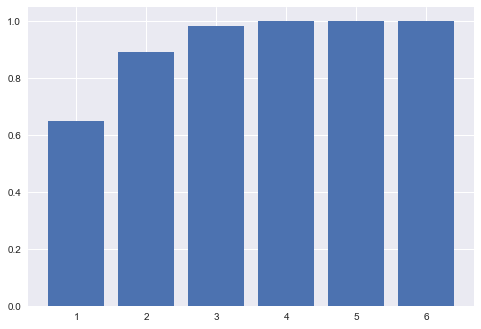

In [183]:
plt.bar(1+np.arange(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

IndexError: index 150 is out of bounds for axis 0 with size 150

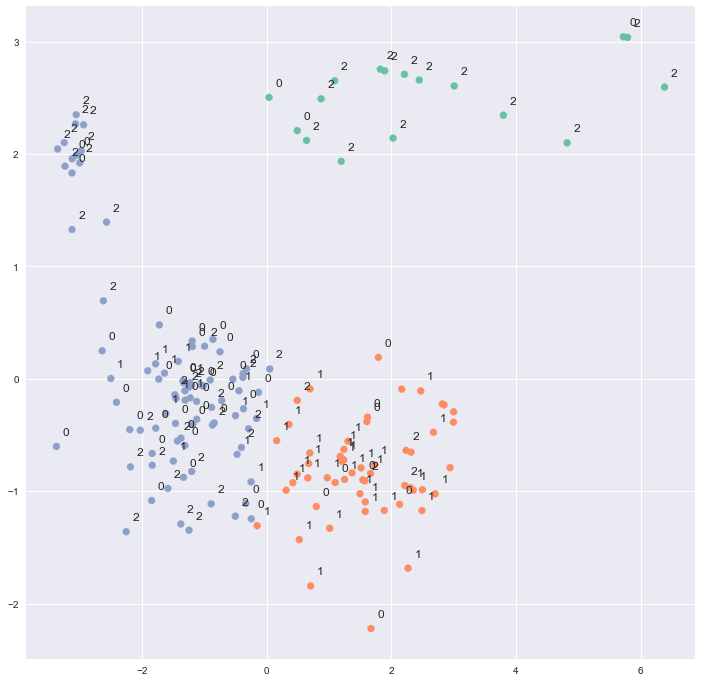

In [178]:
plt.figure(figsize=(12,12))
plt.scatter(z[:,0],z[:,1],c=np.array(colors)[groups])

for i in range(samples.shape[0]):
    plt.annotate(labels[i],xy=(z[i,0],z[i,1]),xytext = (z[i,0]+0.1,z[i,1]+0.1))

plt.show()

Rozwiazanie:

import seaborn as sns
colors = sns.color_palette("Set2", 20)

samples = pd.read_csv("fish.csv", sep=";",decimal=",")

pca = PCA(2)
z = pca.fit_transform(scale(samples.iloc[:,:-1]))

km = KMeans(7)
labels = km.fit_predict(scale(samples.iloc[:,:-1]))

plt.figure(figsize=(12,12))
plt.scatter(z[:,0],z[:,1],c=np.array(colors)[labels])

#for i in range(z.shape[0]):
    #plt.annotate(samples.iloc[i,-1],xy=(z[i,0],z[i,1]),xytext = (z[i,0]+0.1,z[i,1]+0.1))

plt.show()